<center><div style="border-radius:0px; border:3eb489 ; padding: 12px; background-color: e6f2e6; font-size:110%; text-align:center">Bienvenue dans ce carnet de démarrage sur l'ensemble de données sur l'obésité Les données consistent en l'estimation des niveaux d'obésité chez les personnes des pays du Mexique, du Pérou et de la Colombie, âgées de 14 à 61 ans et ayant des habitudes alimentaires et des conditions physiques diverses. Les données ont été collectées à l'aide d'une plateforme Web avec une enquête à laquelle des utilisateurs anonymes ont répondu. chaque question, puis les informations ont été traitées pour obtenir 17 attributs et 2111 enregistrements..</div>


- **FAVC** - Consommation fréquente d'aliments riches en calories
- **FCVC** - Fréquence de consommation de légumes
- **NCP** - Nombre de repas principaux
- **CAEC** - Consommation de nourriture entre les repas
- **CH2O** - Consommation d'eau quotidienne
- **CALC** - Consommation d'alcool
- **SCC** - Les attributs liés à la condition physique sont : Suivi de la consommation de calories
- **FAF** - Fréquence d'activité physique
- **TUE** - Temps passé à utiliser des appareils technologiques
- **MTRANS** - Transport utilisé

# <center><div style="font-family: 'Roboto', sans-serif;">  Packages  </div></center>
<div style="background-color:Grey"; padding: 20px; border-radius: 7px;">
<p style="font-size:17px; font-family:'Roboto', sans-serif; line-height: 1.7em;">Cet extrait de code importe des bibliothèques pour effectuer des manipulations de données, utiliser des expressions régulières, afficher des barres de progression, générer des valeurs aléatoires, effectuer des tâches de traitement du langage naturel telles que l'analyse des sentiments, créer des nuages de mots et tracer des données à l'aide de diverses bibliothèques de visualisation.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Définissez le style de traçage sur 'darkgrid'.
sns.set_style('darkgrid')

# Définissez une carte de couleurs personnalisée pour les catégories de sentiments basées sur la palette Kaggle.
custom_colors_map = {
    'Negative': '#6495ED',  # Cornflower Blue
    'Neutral': '#A9A9A9',  # Dark Gray
    'Positive': '#00CED1'  # Dark Turquoise
}


# <center><div style="font-family: 'Roboto', sans-serif;"> Préparation </div></center>
<div style="background-color:Grey; padding: 20px; border-radius: 7px;">
<p style="font-size:17px; font-family:'Roboto', sans-serif; line-height: 1.7em;">Ce segment de code effectue des tâches telles que l'importation des données dans le nettoyage et la correction des données datafamre.

In [ ]:
df = pd.read_csv("/content/ObesityDataSet.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.shape

(2111, 17)

### vérifie la valeur nulle

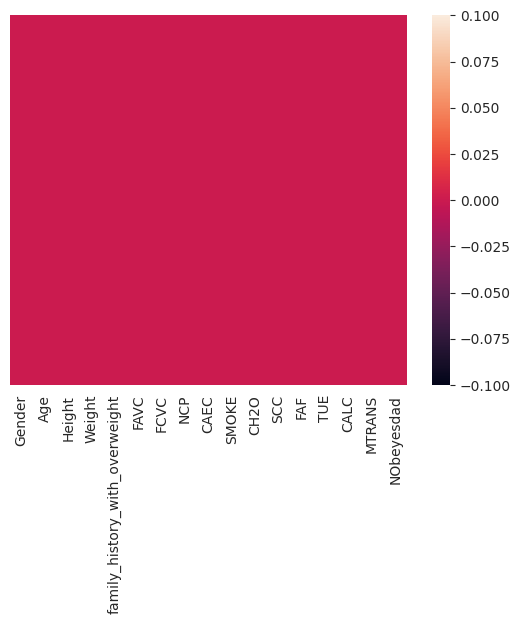

In [ ]:
sns.heatmap(df.isnull(),annot=False,yticklabels=False)
plt.show()

Aucune donnée nulle disponible dans le Dataframe

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'favc', 'fcvc', 'ncp', 'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue',
       'calc', 'mtrans', 'nobeyesdad'],
      dtype='object')

# <center><div style="font-family: 'Roboto', sans-serif;"> EDA </div></center>
<div style="background-color:Grey; padding: 20px; border-radius: 7px;">
<p style="font-size:17px; font-family:'Roboto', sans-serif; line-height: 1.7em;">Ce segment de code effectue des tâches telles que la recherche d'une relation entre les données et l'analyse de base.

Calculez l'IMC de la personne en fonction de la taille et du poids

In [ ]:
df['bmi'] = df['weight']/df['height']

In [ ]:
def bmi_category(bmi):

    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi <= 24.9:
        return "Normal"
    elif 25.0 <= bmi <= 29.9:
        return "Overweight"
    elif 30.0 <= bmi <= 34.9:
        return "Obesity I"
    elif 35.0 <= bmi <= 39.9:
        return "Obesity II"
    else:
        return "Obesity III"


In [ ]:
df['obsese_cat'] = df['bmi'].apply(lambda x : bmi_category(x))

In [ ]:
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,bmi,obsese_cat
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,39.506173,Obesity II
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,36.842105,Obesity II
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,42.777778,Obesity III
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,48.333333,Obesity III
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,50.449438,Obesity III


In [ ]:
fig = px.histogram(data_frame=df,x="age",marginal="box",color="gender")
fig.update_layout(template='plotly_dark', title_x=0.5, yaxis_title='Counts', xaxis_title='Age',title="Age Distribution")
fig.show()

In [ ]:
fig = px.scatter(data_frame=df,y="height",x="weight",size="bmi",color="gender",trendline="ols")
fig.update_layout(template='plotly_dark')
fig.show()

In [ ]:
fig = px.histogram(data_frame=df,x="age",color="obsese_cat",marginal='box')
fig.update_layout(template='plotly_dark')
fig.show()

In [ ]:
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,bmi,obsese_cat
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,39.506173,Obesity II
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,36.842105,Obesity II
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,42.777778,Obesity III
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,48.333333,Obesity III
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,50.449438,Obesity III


In [ ]:
df_numeric = df [["fcvc","ncp","ch2o","faf","tue","bmi"]]

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(random_state=1,method='exact',n_components=5,learning_rate=1)

tsne_features = model.fit_transform(df_numeric)

tsne_features[1:4,:]

array([[-1.9934163 ,  3.4833446 ,  0.45150673,  0.49725303,  2.5137815 ],
       [-1.517912  , -0.4701977 , -0.6378759 ,  0.44168404,  2.0991266 ],
       [-1.111289  ,  0.46279225, -1.2649013 , -1.7689294 , -2.5708795 ]],
      dtype=float32)

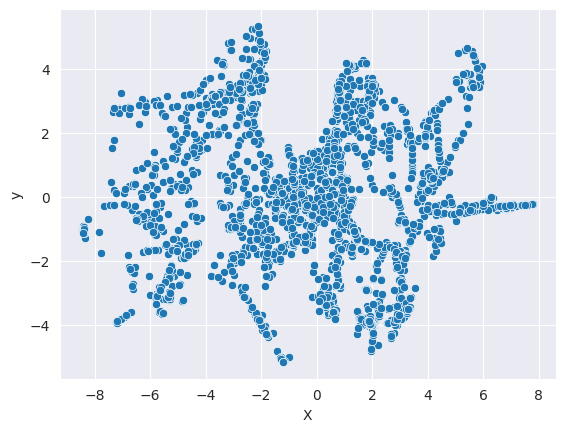

In [ ]:
#attribuer les fonctionnalités TNSE à l'ensemble de données

df_numeric['X'] = tsne_features[:,0]
df_numeric['y'] = tsne_features[:,1]

sns.scatterplot(data=df_numeric,x="X",y="y")
plt.show()

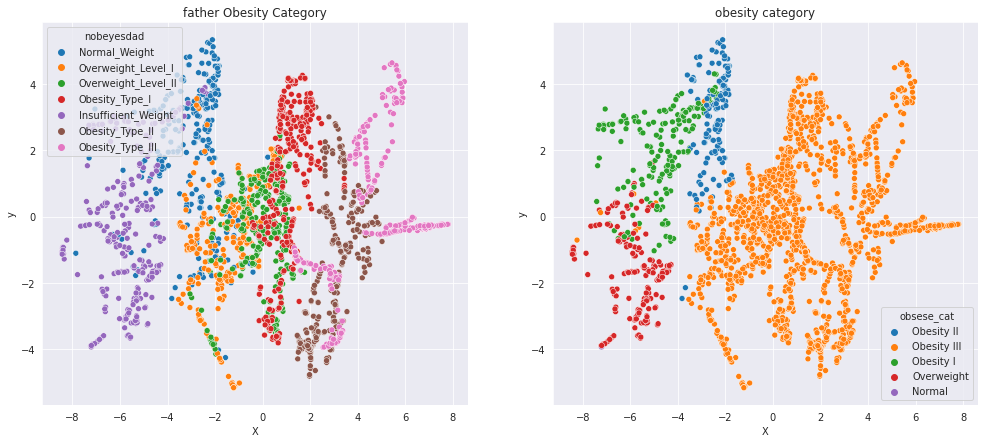

In [ ]:
df['X'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]


fig, ax = plt.subplots(1,2,figsize=(17,7),dpi=71)
sns.scatterplot(data=df,x="X",y="y",hue="nobeyesdad",ax=ax[0])
sns.scatterplot(data=df,x="X",y="y",hue="obsese_cat",ax=ax[1])
ax[0].set_title("father Obesity Category")
ax[1].set_title("obesity category")
plt.show()

À partir de la comparaison du diagramme ci-dessus, nous pourrions confirmer que l'obésité du père affecte la catégorie de poids de l'enfant.

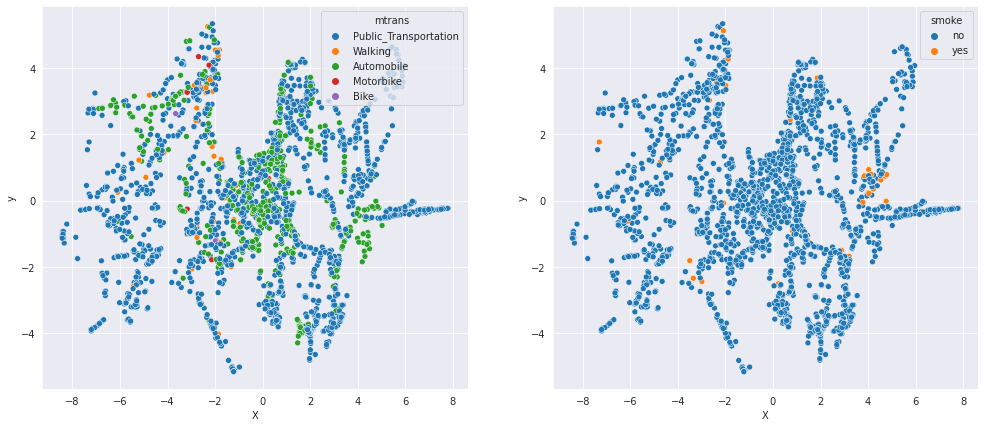

In [ ]:

fig, ax = plt.subplots(1,2,figsize=(17,7),dpi=71)
sns.scatterplot(data=df,x="X",y="y",hue="mtrans",ax=ax[0])
sns.scatterplot(data=df,x="X",y="y",hue="smoke",ax=ax[1])
plt.show()

de la comparaison ci-dessus, nous pouvons voir que le tabagisme a très peu d'impact sur l'obésité.

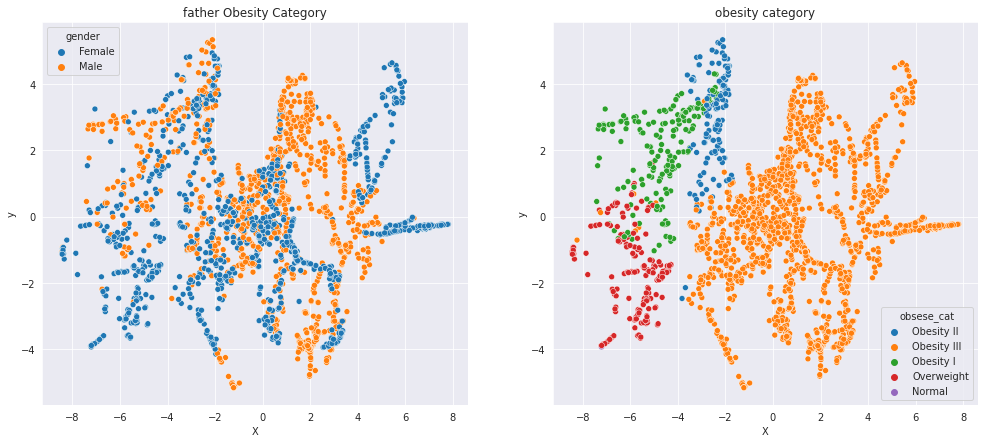

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(17,7),dpi=71)
sns.scatterplot(data=df,x="X",y="y",hue="gender",ax=ax[0])
sns.scatterplot(data=df,x="X",y="y",hue="obsese_cat",ax=ax[1])
ax[0].set_title("father Obesity Category")
ax[1].set_title("obesity category")
plt.show()

In [ ]:
df.describe(exclude='number')

,gender,family_history_with_overweight,favc,caec,smoke,scc,calc,mtrans,nobeyesdad,obsese_cat
count,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7,5
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I,Obesity III
freq,1068,1726,1866,1765,2067,2015,1401,1580,351,1617


### Seuil de variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel =VarianceThreshold(threshold=1)

sel.fit(df_numeric)

mask = sel.get_support()
print(mask)

[False False False False False  True  True  True]


In [ ]:
df_numeric.shape

(2111, 8)

In [ ]:
reduced_df = df_numeric.loc[:,mask]
print(reduced_df.shape)

(2111, 3)


 Normaliser l'*écart*

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.005)
sel.fit(df_numeric/df_numeric.mean())

mask = sel.get_support()
reduced_df = df_numeric.iloc[:,mask]
print(reduced_df.shape)

(2111, 8)


#Supprimer les données hautement corrélées

In [ ]:
# Create positive correlation matrix

corr_df = df_numeric.corr().abs()

#create and apply mask

mask = np.triu(np.ones_like(corr_df,dtype=bool))

tri_df = corr_df.mask(mask)
tri_df

,fcvc,ncp,ch2o,faf,tue,bmi,X,y
fcvc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ncp,0.042216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch2o,0.068461,0.057088,NaN,NaN,NaN,NaN,NaN,NaN
faf,0.019939,0.129504,0.167236,NaN,NaN,NaN,NaN,NaN
tue,0.101135,0.036326,0.011965,0.058562,NaN,NaN,NaN,NaN
bmi,0.242711,0.077520,0.177359,0.112348,0.085651,NaN,NaN,NaN
X,0.272422,0.026095,0.215515,0.148852,0.166601,0.948887,NaN,NaN
y,0.053168,0.253122,0.008976,0.237196,0.145547,0.041151,0.002066,NaN


In [ ]:
#find columns that meet threshold

to_drop = [c for c in tri_df.columns if any (tri_df[c] > 0.8)]
print(to_drop)
print(len(to_drop))

['bmi']
1


Seul l'IMC est la donnée hautement corrélée car elle est calculée avec la taille et le poids afin que nous puissions les supprimer de l'ensemble de données.

### Sélection d'une fonctionnalité pour les performances du modèle



In [ ]:
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,...,scc,faf,tue,calc,mtrans,nobeyesdad,bmi,obsese_cat,X,y
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,no,0.0,1.0,no,Public_Transportation,Normal_Weight,39.506173,Obesity II,-2.974048,0.687839
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,36.842105,Obesity II,-1.993416,3.483345
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,42.777778,Obesity III,-1.517912,-0.470198
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,48.333333,Obesity III,-1.111289,0.462792
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,50.449438,Obesity III,0.201975,-3.249493


In [ ]:
df = df.drop(['X','y','bmi'],axis=1)

In [ ]:
sample = pd.get_dummies(df)

In [ ]:
sample.columns

Index(['age', 'height', 'weight', 'fcvc', 'ncp', 'ch2o', 'faf', 'tue',
       'gender_Female', 'gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'favc_no', 'favc_yes',
       'caec_Always', 'caec_Frequently', 'caec_Sometimes', 'caec_no',
       'smoke_no', 'smoke_yes', 'scc_no', 'scc_yes', 'calc_Always',
       'calc_Frequently', 'calc_Sometimes', 'calc_no', 'mtrans_Automobile',
       'mtrans_Bike', 'mtrans_Motorbike', 'mtrans_Public_Transportation',
       'mtrans_Walking', 'nobeyesdad_Insufficient_Weight',
       'nobeyesdad_Normal_Weight', 'nobeyesdad_Obesity_Type_I',
       'nobeyesdad_Obesity_Type_II', 'nobeyesdad_Obesity_Type_III',
       'nobeyesdad_Overweight_Level_I', 'nobeyesdad_Overweight_Level_II',
       'obsese_cat_Normal', 'obsese_cat_Obesity I', 'obsese_cat_Obesity II',
       'obsese_cat_Obesity III', 'obsese_cat_Overweight'],
      dtype='object')

In [ ]:
X = sample.drop(["obsese_cat_Normal","obsese_cat_Obesity I",'obsese_cat_Obesity II','obsese_cat_Obesity III','obsese_cat_Overweight'],axis=1)
y = sample[["obsese_cat_Normal","obsese_cat_Obesity I",'obsese_cat_Obesity II','obsese_cat_Obesity III','obsese_cat_Overweight']]

# <center><div style="font-family: 'Roboto', sans-serif;"> Ingénierie des fonctionnalités </div></center>
<div style="background-color:Grey; padding: 20px; border-radius: 7px;">
<p style="font-size:17px; font-family:'Roboto', sans-serif; line-height: 1.7em;">L'ingénierie des fonctionnalités fait référence à la manipulation (ajout, suppression, combinaison, mutation) de votre ensemble de données. pour améliorer la formation des modèles d'apprentissage automatique, conduisant à de meilleures performances et à une plus grande précision.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Convertir les étiquettes en une matrice binaire
mlb = MultiLabelBinarizer()
y_binary = mlb.fit_transform(y.values)

In [ ]:
# Divisez les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


In [ ]:
# Choisissez un classificateur de base (par exemple, Random Forest)
base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Utilisez MultiOutputClassifier avec le classificateur de base
classifier = MultiOutputClassifier(base_classifier)

In [ ]:
# Train the model
classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [ ]:
# Faire des prédictions sur l'ensemble de test
y_pred = classifier.predict(X_test)

In [ ]:
# Convertissez les prédictions binaires en étiquettes d'origine
y_pred_labels = mlb.inverse_transform(y_pred)
y_test_labels = mlb.inverse_transform(y_test)

In [ ]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


### Utilisation du classificateur Random Forest

In [ ]:


X = sample.drop(["obsese_cat_Normal","obsese_cat_Obesity I",'obsese_cat_Obesity II','obsese_cat_Obesity III','obsese_cat_Overweight'],axis=1)
y = sample[["obsese_cat_Normal","obsese_cat_Obesity I",'obsese_cat_Obesity II','obsese_cat_Obesity III','obsese_cat_Overweight']]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# En supposant que X est votre matrice de fonctionnalités et y est un DataFrame avec quatre colonnes (y1, y2, y3, y4)

# Example:
# X = ...
# y = pd.DataFrame({'y1': [1, 0, 1, 0], 'y2': [0, 1, 1, 0], 'y3': [1, 1, 0, 0], 'y4': [0, 1, 0, 1]})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classifier (e.g., Random Forest)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)


                               Feature  Importance
2                               weight    0.316159
31      nobeyesdad_Insufficient_Weight    0.129543
32            nobeyesdad_Normal_Weight    0.092796
1                               height    0.053571
0                                  age    0.047580
11  family_history_with_overweight_yes    0.046877
10   family_history_with_overweight_no    0.043883
6                                  faf    0.023982
4                                  ncp    0.023120
7                                  tue    0.022880
16                      caec_Sometimes    0.021890
15                     caec_Frequently    0.021681
5                                 ch2o    0.019678
3                                 fcvc    0.018801
36       nobeyesdad_Overweight_Level_I    0.013811
9                          gender_Male    0.013639
8                        gender_Female    0.011711
29        mtrans_Public_Transportation    0.009349
25                             

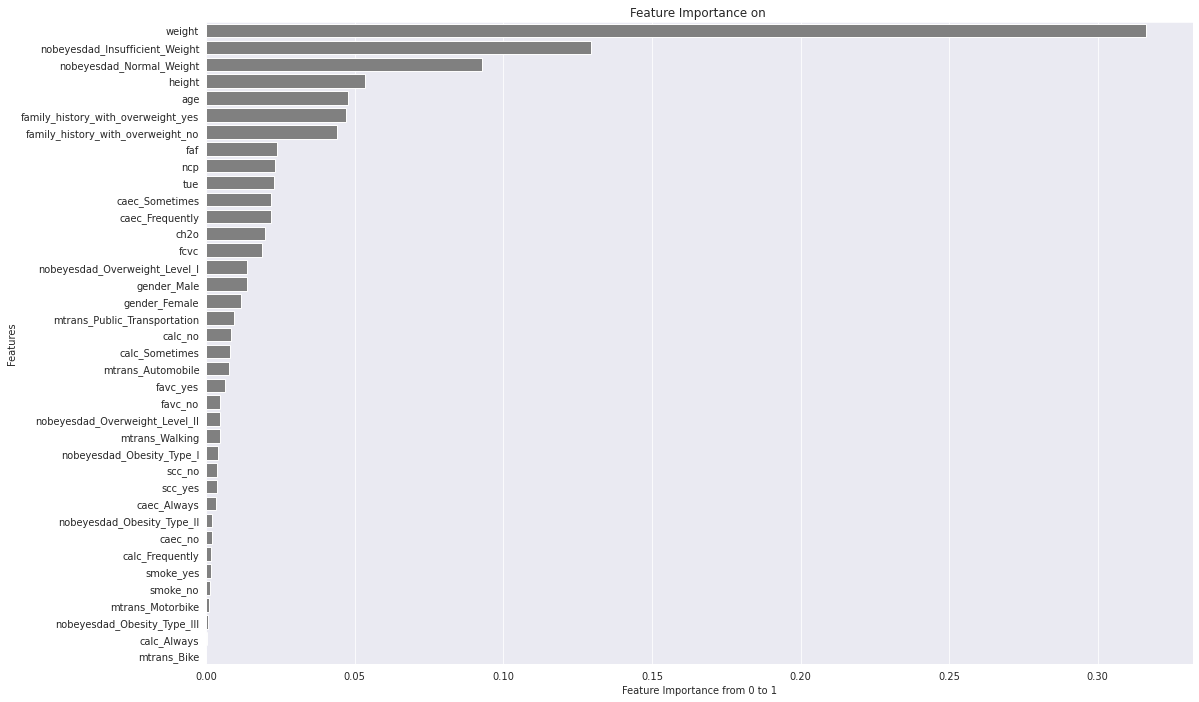

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(17,10),dpi=71)
sns.barplot(data=importance_df,y='Feature',x='Importance',color='grey')
plt.xlabel("Feature Importance from 0 to 1")
plt.ylabel("Features")
plt.title("Feature Importance on ")
plt.tight_layout()
plt.show()

# # Le poids est le facteur majeur de l'obésité et le mode de transport vélo réduit les risques d'obésité